<a href="https://colab.research.google.com/github/Vlasovets/qiime2/blob/main/Copy_of_QIIME2_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## qiime2 Installation

In [32]:
""" Do not use this on a local machine. """

import os
import sys
from subprocess import Popen, PIPE

In [33]:
r = Popen(["pip", "install", "rich"])
r.wait()
from rich.console import Console  # noqa
con = Console()

In [34]:
has_conda = "conda version" in os.popen("conda info").read()
has_qiime = "QIIME 2 release:" in os.popen("qiime info").read()

In [35]:
MINICONDA_PATH = (
    "https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh"
)
QIIME_YAML_URL = (
    "https://data.qiime2.org/distro/core/qiime2-2020.2-py36-linux-conda.yml"
)
QIIME_YAML = os.path.basename(QIIME_YAML_URL)

In [36]:
def cleanup():
    """Remove downloaded files."""
    if os.path.exists("Miniconda3-latest-Linux-x86_64.sh"):
        os.remove("Miniconda3-latest-Linux-x86_64.sh")
    if os.path.exists(QIIME_YAML):
        os.remove(QIIME_YAML)
    con.log("Cleaned up unneeded files.")

In [37]:
def run_and_check(args, check, message, failure, success, console=con):
    """Run a command and check that it worked."""
    console.log(message)
    r = Popen(args, env=os.environ, stdout=PIPE, stderr=PIPE,
              universal_newlines=True)
    o, e = r.communicate()
    out = o + e
    if r.returncode == 0 and check in out:
        console.log("[blue]%s[/blue]" % success)
    else:
        console.log("[red]%s[/red]" % failure, out)
        cleanup()
        sys.exit(1)

In [38]:
if __name__ == "__main__":
    if not has_conda:
        run_and_check(
            ["wget", MINICONDA_PATH],
            "saved",
            ":snake: Downloading miniconda...",
            "failed downloading miniconda :sob:",
            ":snake: Done."
        )

        run_and_check(
            ["bash", "Miniconda3-latest-Linux-x86_64.sh", "-bfp", "/usr/local"],
            "installation finished.",
            ":snake: Installing miniconda...",
            "could not install miniconda :sob:",
            ":snake: Installed miniconda to `/usr/local` :snake:"
        )
    else:
        con.log(":snake: Miniconda is already installed. Skipped.")
    !python -V
    if not has_qiime:
        run_and_check(
            ["wget", QIIME_YAML_URL],
            "saved",
            ":mag: Downloading Qiime 2 package list...",
            "could not download package list :sob:",
            ":mag: Done."
        )

        run_and_check(
            ["conda", "env", "update", "-n", "base", "--file",
             "qiime2-2020.2-py36-linux-conda.yml"],
            "To activate this environment, use",
            ":mag: Installing Qiime 2. This may take a little bit.\n :clock1:",
            "could not install Qiime 2 :sob:",
            ":mag: Done."
        )
    else:
        con.log(":mag: Qiime 2 is already installed. Skipped.")

    sys.path.append("/usr/local/lib/python3.6/site-packages")
    con.log(":mag: Fixed import paths to include Qiime 2.")

    run_and_check(
        ["qiime", "info"],
        "QIIME 2 release:",
        ":bar_chart: Checking that Qiime 2 command line works...",
        "Qiime 2 command line does not seem to work :sob:",
        ":bar_chart: Qiime 2 command line looks good :tada:"
    )

    con.log(":bar_chart: Checking if Qiime 2 import works...")
    try:
        import qiime2  # noqa
    except Exception:
        con.log("[red]Qiime 2 can not be imported :sob:[/red]")
        sys.exit(1)
    con.log("[blue]:bar_chart: Qiime 2 can be imported :tada:[/blue]")

    cleanup()

    con.log("[green]Everything is A-OK. "
            "You can start using Qiime 2 now :thumbs_up:[/green]")

[19:30:03] 🐍 Miniconda is already installed. <ipython-input-38-6d1fbe529108>:19
           Skipped.                                                             
Python 3.6.7
[19:30:04] 🔍 Qiime 2 is already installed.   <ipython-input-38-6d1fbe529108>:39
           Skipped.                                                             
           🔍 Fixed import paths to include   <ipython-input-38-6d1fbe529108>:42
           Qiime 2.                                                             
           📊 Checking that Qiime 2 command    <ipython-input-37-186584deeb39>:3
           line works...                                                        
[19:30:05] 📊 Qiime 2 command line looks good  <ipython-input-37-186584deeb39>:9
           🎉                                                                   
           📊 Checking if Qiime 2 import      <ipython-input-38-6d1fbe529108>:52
           works...                                                             
           📊 Qiime 2 c

In [39]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/site-packages/q2_feature_table',
 '/usr/local/lib/python3.6/site-packages/q2_diversity',
 '/usr/local/lib/python3.6/site-packages']

In [40]:
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages/q2_feature_table"))
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages/q2_diversity"))

# qiime2 Plugins (libraries, packages) 

In [41]:
import qiime2 as q2

In [42]:
import q2_feature_table, q2_demux, q2_alignment, q2_cutadapt
import q2_dada2, q2_deblur, q2_feature_classifier, q2_fragment_insertion

In [43]:
from qiime2.plugin import (Plugin, Str, Properties, Choices, Int, Bool, Range,
                           Float, Set, Visualization, Metadata, MetadataColumn,
                           Categorical, Numeric, Citations)

In [44]:
# check the installed plugins
!qiime info

System versions
Python version: 3.6.7
QIIME 2 release: 2020.2
QIIME 2 version: 2020.2.0
q2cli version: 2020.2.0

Installed plugins
alignment: 2020.2.0
composition: 2020.2.0
cutadapt: 2020.2.0
dada2: 2020.2.0
deblur: 2020.2.0
demux: 2020.2.0
diversity: 2020.2.0
emperor: 2020.2.0
feature-classifier: 2020.2.0
feature-table: 2020.2.0
fragment-insertion: 2020.2.0
gneiss: 2020.2.0
longitudinal: 2020.2.0
metadata: 2020.2.0
phylogeny: 2020.2.0
quality-control: 2020.2.0
quality-filter: 2020.2.0
sample-classifier: 2020.2.0
taxa: 2020.2.0
types: 2020.2.0
vsearch: 2020.2.0

Application config directory
/root/.config/q2cli

Getting help
To get help with QIIME 2, visit https://qiime2.org


## Parkinson’s Mouse Tutorial from [qiime2.org](https://docs.qiime2.org/2020.8/tutorials/pd-mice/)

## Abstract
This tutorial will demonstrate a “typical” QIIME 2 analysis of 16S rRNA gene amplicon data, using a set of fecal samples from humanized mice. The original study, Sampson et al, 2016, was designed to determine whether the fecal microbiome contributed to the development of Parkinson’s Disease (PD). Several observation studies showed a difference in the microbiome between PD patients and controls, although the organisms identified across studies were not consistent. However, this was sufficient evidence to suggest that there might be a relationship between PD and the fecal microbiome.

To determine whether that relationship was incidental or actually disease associated, a second study was needed. A human cohort study was not feasible; the disease only affects about 1% of the population over 60 years old, PD takes a long time to develop and to be diagnosed, and it would be difficult to determine when to collect the samples. Therefore, a gnotobiotic mouse study was utilized to evaluate the role of the microbiome in the development of PD symptoms. Feces were collected from six donors with Parkinson’s disease and six age- and sex-matched neurologically healthy controls, and then transplanted into mice who were either predisposed to developing Parkinson’s disease due to a mutation (“aSyn”) or resistant wild type mice (“BDF1”). Mice from different donors were kept in separate cages, but mice from different genetic backgrounds were co-housed. The mice were followed for 7 weeks to see if they developed symptoms of Parkinson’s disease.

## Data 
We’ll look at a subset of data from two human donors (one healthy and one with PD) whose samples were each transplanted into three separate cages of mice from the susceptible genotype. For this tutorial, a subset of the metadata has been prepared, and the sequences have been subsampled to approximately 5000 sequences per sample to allow the tutorial to run in a short time. The sequences for the full study are accessible at EBI with accession PRJEB17694; processed tables from the full study can be downloaded from the Qiita database from study 10483.



## Hypothesis
This tutorial will explore the hypothesis that the genetic background of a humanized mouse influences the microbial community. However, we’ll also need to consider other confounders which might drive the shape of the microbiome instead of the mouse genotype.

In [45]:
import pandas as pd
import numpy as np

In [46]:
!mkdir ./demultiplexed_seqs
!cd ./demultiplexed_seqs

mkdir: cannot create directory ‘./demultiplexed_seqs’: File exists


In [47]:
!wget https://raw.githubusercontent.com/cappelchi/storage/master/qiime2/parkinson/filereport_read_run_PRJEB17694_json.txt
project = pd.read_json('/content/filereport_read_run_PRJEB17694_json.txt')

--2020-10-22 19:30:06--  https://raw.githubusercontent.com/cappelchi/storage/master/qiime2/parkinson/filereport_read_run_PRJEB17694_json.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236288 (231K) [text/plain]
Saving to: ‘filereport_read_run_PRJEB17694_json.txt.1’

filereport_read_run 100%[===================>] 230.75K  --.-KB/s    in 0.03s   

2020-10-22 19:30:06 (6.84 MB/s) - ‘filereport_read_run_PRJEB17694_json.txt.1’ saved [236288/236288]



In [48]:
project.head()

,run_accession,study_accession,sample_accession,experiment_accession,tax_id,scientific_name,fastq_ftp,submitted_ftp,sra_ftp,sample_alias
0,ERR1722239,PRJEB17694,SAMEA4535274,ERX1792191,408170,human gut metagenome,ftp.sra.ebi.ac.uk/vol1/fastq/ERR172/009/ERR172...,ftp.sra.ebi.ac.uk/vol1/run/ERR172/ERR1722239/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR172/009/ERR1722239,qiita_sid_10483:10483.recip.452.ASO.PD3.D7
1,ERR1731959,PRJEB17694,SAMEA4548192,ERX1801867,256318,metagenome,ftp.sra.ebi.ac.uk/vol1/fastq/ERR173/009/ERR173...,ftp.sra.ebi.ac.uk/vol1/run/ERR173/ERR1731959/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR173/009/ERR1731959,qiita_sid_10483:10483.BLANK1.1A
2,ERR1731960,PRJEB17694,SAMEA4548193,ERX1801868,256318,metagenome,ftp.sra.ebi.ac.uk/vol1/fastq/ERR173/000/ERR173...,ftp.sra.ebi.ac.uk/vol1/run/ERR173/ERR1731960/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR173/000/ERR1731960,qiita_sid_10483:10483.BLANK1.1C
3,ERR1731961,PRJEB17694,SAMEA4548194,ERX1801869,256318,metagenome,ftp.sra.ebi.ac.uk/vol1/fastq/ERR173/001/ERR173...,ftp.sra.ebi.ac.uk/vol1/run/ERR173/ERR1731961/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR173/001/ERR1731961,qiita_sid_10483:10483.BLANK1.1F
4,ERR1731962,PRJEB17694,SAMEA4548195,ERX1801870,256318,metagenome,ftp.sra.ebi.ac.uk/vol1/fastq/ERR173/002/ERR173...,ftp.sra.ebi.ac.uk/vol1/run/ERR173/ERR1731962/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR173/002/ERR1731962,qiita_sid_10483:10483.BLANK1.1G


In [49]:
accession_dict = {}
for cnt, file in enumerate(project.submitted_ftp):
    accession_dict[file.split('/')[-1]] = cnt

###Metadata
Before starting any analysis, it’s important to be familiar with the metadata. In this study, the metadata file contains 7 columns:
- sample name
- barcode
- mouse ID
- genotype
- cage ID
- donor
- donor status (Donor pd_1 had Parkinson’s disease; hc_1 was neurologically healthy)
- days post transplant
- genotype and donor status

In [50]:
!wget \
  -O "metadata.tsv" \
  "https://data.qiime2.org/2020.8/tutorials/pd-mice/sample_metadata.tsv"

--2020-10-22 19:30:07--  https://data.qiime2.org/2020.8/tutorials/pd-mice/sample_metadata.tsv
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://docs.google.com/spreadsheets/d/e/2PACX-1vRe42IpLxZI1V5gtkuej2vuO31tyu0NCRbjECXx8SuQcarHhEqFFyluwmU72BesGWfEH-IX_tXGs8FX/pub?gid=1509704122&single=true&output=tsv [following]
--2020-10-22 19:30:07--  https://docs.google.com/spreadsheets/d/e/2PACX-1vRe42IpLxZI1V5gtkuej2vuO31tyu0NCRbjECXx8SuQcarHhEqFFyluwmU72BesGWfEH-IX_tXGs8FX/pub?gid=1509704122&single=true&output=tsv
Resolving docs.google.com (docs.google.com)... 74.125.197.138, 74.125.197.102, 74.125.197.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-08-6o-sheets.googleusercontent.com/pub/l5l039s6ni5uumqbsj9o11lm

In [51]:
metadata = pd.read_csv('metadata.tsv', sep = '\t', 
                       names = ['sample_name',	'barcode',	'mouse_id',	'genotype',
                                'cage_id',	'donor',	'donor_status',
                                'days_post_transplant',	'genotype_and_donor_status'],
                       skiprows = 2)

In [52]:
metadata.head()

,sample_name,barcode,mouse_id,genotype,cage_id,donor,donor_status,days_post_transplant,genotype_and_donor_status
0,recip.220.WT.OB1.D7,CCTCCGTCATGG,457,wild type,C35,hc_1,Healthy,49,wild type and Healthy
1,recip.290.ASO.OB2.D1,AACAGTAAACAA,456,susceptible,C35,hc_1,Healthy,49,susceptible and Healthy
2,recip.389.WT.HC2.D21,ATGTATCAATTA,435,susceptible,C31,hc_1,Healthy,21,susceptible and Healthy
3,recip.391.ASO.PD2.D14,GTCAGTATGGCT,435,susceptible,C31,hc_1,Healthy,14,susceptible and Healthy
4,recip.391.ASO.PD2.D21,AGACAGTAGGAG,437,susceptible,C31,hc_1,Healthy,21,susceptible and Healthy


In [53]:
from collections import Counter
print(Counter(metadata.genotype))
print(Counter(metadata.donor))
print(Counter(metadata.donor_status))
print(Counter(metadata.days_post_transplant))
print(Counter(metadata.genotype_and_donor_status))

Counter({'wild type': 24, 'susceptible': 24})
Counter({'hc_1': 24, 'pd_1': 24})
Counter({'Healthy': 24, 'PD': 24})
Counter({49: 12, 21: 12, 14: 12, 7: 12})
Counter({'wild type and Healthy': 12, 'susceptible and Healthy': 12, 'susceptible and PD': 12, 'wild type and PD': 12})


In [54]:
from qiime2 import Metadata
import biom
import requests
import os.path

In [55]:
metadata_api = Metadata.load('metadata.tsv')

In [56]:
metadata_api

Metadata
--------
48 IDs x 8 columns
barcode:                   ColumnProperties(type='categorical')
mouse_id:                  ColumnProperties(type='categorical')
genotype:                  ColumnProperties(type='categorical')
cage_id:                   ColumnProperties(type='categorical')
donor:                     ColumnProperties(type='categorical')
donor_status:              ColumnProperties(type='categorical')
days_post_transplant:      ColumnProperties(type='numeric')
genotype_and_donor_status: ColumnProperties(type='categorical')

Call to_dataframe() for a tabular representation.

Even though the mouse ID looks like a number, we will specify that it is categorical using the #q2_type directive.

In [57]:
!qiime metadata tabulate \
  --m-input-file metadata.tsv \
  --o-visualization metadata.qzv

Saved Visualization to: metadata.qzv


## Importing data into QIIME 2
In QIIME 2, all data is structured as an Artifact of a specific semantic type. Artifacts contain the data as well as information about the data, including a record of the original data and the tools used to process it.

Our samples were amplified using the EMP 515f-806r primers and sequenced on an Illumina MiSeq with a 2x150bp kit. The hypervariable region covered by the primers we used is 290bp long, so with 150bp reads our sequences will be slightly too short to be able to do paired-end analysis downstream. Therefore, we’re going to work with single-end sequences. We will work with a version of the samples which have already been demultiplexed, for example, by the sequencing center. If you need to demultiplex your sequences, the [Moving Pictures](https://docs.qiime2.org/2020.8/tutorials/moving-pictures/) tutorial describes how to demultiplex sequences if they were sequenced using the Earth Microbiome Project protocol.

We will import the sequences as SampleData[SequencesWithQuality], which is the demultiplexed single-end sequence format. If we wanted to import paired-sequences, we would specify the semantic type SampleData[PairedEndSequencesWithQuality]. We will import the sequences using the sample manifest format, a versatile way to import demultiplexed data in QIIME 2. We create a tab-separated sample manifest file that maps the sample name we want to use in QIIME 2 to the path of the sequence file. The benefit is that the demultiplexed sequence files can be named anything you want; there are not fixed assumptions about the conventions, and the file names do not dictate the final name. When QIIME 2 reads the file, it ignores any line prefixed with the # symbol. The first line that doesn’t contain a # is the header line and must be sample-id<TAB>absolute-filepath. The sample order after the header line does not matter. 


## Download the manifest

In [58]:
!wget \
  -O "manifest.tsv" \
  "https://data.qiime2.org/2020.8/tutorials/pd-mice/manifest"

--2020-10-22 19:30:13--  https://data.qiime2.org/2020.8/tutorials/pd-mice/manifest
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/pd-mice/manifest [following]
--2020-10-22 19:30:13--  https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/pd-mice/manifest
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.208.216
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.208.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4640 (4.5K) [binary/octet-stream]
Saving to: ‘manifest.tsv’

manifest.tsv        100%[===================>]   4.53K  --.-KB/s    in 0s      

2020-10-22 19:30:13 (148 MB/s) - ‘manifest.tsv’ saved [4640/4640]



In [59]:
manifest = pd.read_csv('manifest.tsv', sep = '\t', header =0)

In [60]:
len(manifest)

48

In [61]:
manifest_dict = {}
for cnt, file in enumerate(manifest['absolute-filepath']):
    manifest_dict[file.split('/')[-1]] = cnt

In [62]:
for key_man in manifest_dict.keys():
    for key_acc in accession_dict.keys():
        if key_acc.split('10483.')[-1].split('.fastq.gz')[0] in key_man:
            #print ('in manifest: ', key_man, manifest_dict[key_man])
            #print ('in accession: ', key_acc, accession_dict[key_acc])
            dwnld = 'http://' + project.submitted_ftp[accession_dict[key_acc]]
            save_as = manifest['absolute-filepath'][manifest_dict[key_man]].split('$PWD/')[1]
            #!wget ––tries=5 -O {save_as} {dwnld}
            if not os.path.isfile(save_as):
                print(dwnld)
                print(save_as)          
                for tries in range(5):
                    print('Try n.', tries)
                    get_file = requests.get(dwnld)
                    print('Status: ', get_file.status_code)
                    if get_file.status_code == 200:
                        open(save_as, 'wb').write(get_file.content)
                        print('Done...')
                        print('\n')   
                        break
                    else:
                        print ('Error n.', get_file.status_code)
            else:
                print('File EXIST: ', save_as)
                print('\n') 

File EXIST:  demultiplexed_seqs/10483.recip.220.WT.OB1.D7_30_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.290.ASO.OB2.D1_27_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.389.WT.HC2.D21_1_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.391.ASO.PD2.D14_5_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.391.ASO.PD2.D21_1_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.391.ASO.PD2.D7_15_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.400.ASO.HC2.D14_32_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.401.ASO.HC2.D7_22_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.403.ASO.PD2.D21_31_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.411.ASO.HC2.D14_9_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/recip.411.ASO.HC2.D21_0_L001_R1_001.fastq.gz


File EXIST:  demultiplexed_seqs/10483.recip.411.ASO.HC2.D49_6_L001_R1_0

In [63]:
for pt in manifest['absolute-filepath']:
    manifest['absolute-filepath'].loc[manifest['absolute-filepath'] == pt] = '/content/' + pt.split('$PWD/')[-1]

In [64]:
manifest.to_csv('manifest2.tsv', sep = '\t', index = None)

In [65]:
!head manifest2.tsv

sample-id	absolute-filepath
recip.220.WT.OB1.D7	/content/demultiplexed_seqs/10483.recip.220.WT.OB1.D7_30_L001_R1_001.fastq.gz
recip.290.ASO.OB2.D1	/content/demultiplexed_seqs/10483.recip.290.ASO.OB2.D1_27_L001_R1_001.fastq.gz
recip.389.WT.HC2.D21	/content/demultiplexed_seqs/10483.recip.389.WT.HC2.D21_1_L001_R1_001.fastq.gz
recip.391.ASO.PD2.D14	/content/demultiplexed_seqs/10483.recip.391.ASO.PD2.D14_5_L001_R1_001.fastq.gz
recip.391.ASO.PD2.D21	/content/demultiplexed_seqs/10483.recip.391.ASO.PD2.D21_1_L001_R1_001.fastq.gz
recip.391.ASO.PD2.D7	/content/demultiplexed_seqs/10483.recip.391.ASO.PD2.D7_15_L001_R1_001.fastq.gz
recip.400.ASO.HC2.D14	/content/demultiplexed_seqs/10483.recip.400.ASO.HC2.D14_32_L001_R1_001.fastq.gz
recip.401.ASO.HC2.D7	/content/demultiplexed_seqs/10483.recip.401.ASO.HC2.D7_22_L001_R1_001.fastq.gz
recip.403.ASO.PD2.D21	/content/demultiplexed_seqs/10483.recip.403.ASO.PD2.D21_31_L001_R1_001.fastq.gz


When using this manifest format, a sample name can only appear in one line and can only map to one sequencing file per column (one column for single-end, two columns for paired-end). The absolute-filepath for each sample must be an absolute path, which specifies the “complete” location of the file. We do that here using the $PWD variable, which expands the current directory in absolute terms.

We’ll use the manifest to import our data.

In [66]:
#from qiime2.plugins import feature_table
from qiime2 import Artifact
import biom
import io
from zipfile import ZipFile, ZipInfo
import csv
import time

def read_zip(zip_fn, extract_fn=None):
    zf = ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return {name:zf.read(name) for name in zf.namelist()}

In [67]:
!pip install tqdm
!pip install plotly

     |████████████████████████████████| 13.1 MB 4.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=6cb8ed47e70c132a3e17a384f9a06adcb606ad468757fc28ba0bc489ed43102a
  Stored in directory: /root/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [68]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [69]:
from qiime2.plugin import Plugin

In [70]:
start_time = time.time()

!qiime tools import \
  --type "SampleData[SequencesWithQuality]" \
  --input-format SingleEndFastqManifestPhred33V2 \
  --input-path ./manifest2.tsv \
  --output-path single-end-demux.qza
  
print("--- %s seconds ---" % (time.time() - start_time))

Imported ./manifest2.tsv as SingleEndFastqManifestPhred33V2 to single-end-demux.qza
--- 7.683532238006592 seconds ---


In [71]:
start_time = time.time()
!qiime demux summarize \
  --i-data ./single-end-demux.qza \
  --o-visualization ./single-end-demux.qzv

print("--- %s seconds ---" % (time.time() - start_time))

Saved Visualization to: ./single-end-demux.qzv
--- 15.29955792427063 seconds ---


In [72]:
!mkdir /content/exported

In [73]:
qza = ZipFile('single-end-demux.qzv', 'r')
qza.printdir()

File Name                                             Modified             Size
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/metadata.yaml 2020-10-22 19:31:44           76
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/checksums.md5 2020-10-22 19:31:46         2554
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/VERSION   2020-10-22 19:31:44           39
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/quality-plot.html 2020-10-22 19:31:44         2542
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/overview.html 2020-10-22 19:31:44         5424
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/demultiplex-summary.pdf 2020-10-22 19:31:44        11045
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/forward-seven-number-summaries.csv 2020-10-22 19:31:44         6987
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/index.html 2020-10-22 19:31:44         1555
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/per-sample-fastq-counts.csv 2020-10-22 19:31:38         1337
9f4fa677-b4c0-4c34-ae0a-5adf5e5f7350/data/data.jsonp 2020-10-22 19:31:44        14840
9f4fa6

In [74]:
archive = 'single-end-demux.qzv'
qza = ZipFile(archive, 'r')
dir_name = qza.namelist()[0].split('/')[0]
file_in_archive = dir_name + '/data/per-sample-fastq-counts.csv'
dsingle_end_demux_qzv = pd.read_csv(io.BytesIO(read_zip(
                                                        archive, 
                                                        file_in_archive
                                                        )))

In [75]:
dsingle_end_demux_qzv.head()

,Sample name,Sequence count
0,recip.467.WT.HC3.D49.a,37042
1,recip.536.ASO.PD4.D49,35945
2,recip.411.ASO.HC2.D21,28739
3,recip.391.ASO.PD2.D21,27568
4,recip.458.ASO.HC3.D49,26246


In [76]:
fig = px.histogram(dsingle_end_demux_qzv, x = "Sequence count")
fig.show()

###Sequence quality control and feature table
There are several ways to construct a feature table in QIIME 2. The first major choice to make is to work with Operational Taxonomic Units (OTUs) or Amplicon Sequence Variants (ASVs). OTUs have been widely used in microbiome research since the mid 2010s, and assign sequences to clusters either based on a reference database or de novo assignment. QIIME 2 offers clustering through q2-vsearch and q2-dbOTU plug-ins, currently.

ASVs are a more recent development and provide better resolution in features than traditional OTU-based methods. ASVs can separate features based on differences of a single nucleotide in sequences of 400 bp or more, a resolution not possibly even with 99% identity OTU clustering. QIIME 2 currently offers denoising via DADA2 (q2-dada2) and Deblur (q2-deblur). The major differences in the algorithms and motivation for denoising are nicely described in Nearing et al, 2018.

It is worth noting in either case that denoising to ASVs and clustering to OTUs are separate, but parallel steps. A choice should be made for a single pathway: either denoising or OTU based clustering; it is not recommended to combine the steps.

In this tutorial, we’ll denoise with DADA2 (using single-end sequences). Please see the Atacama Soil tutorial for an example of using DADA2 on paired-end sequences. For those interested in using Deblur, you can refer to the Moving Pictures tutorial and Alternative methods of read joining tutorial for running Deblur on single- and paired-end sequences, respectively.

The qiime dada2 denoise-single method requires us to set the --p-trunc-len parameter. This controls the length of the sequences and should be selected based on a drop in quality scores. In our dataset, the quality scores are relatively evenly distributed along the sequencing run, so we’ll use the full 150 bp sequences. However, the selection of the trim length is a relatively subjective measurement and relies on the decision making capacity of the analyst.

In [77]:
start_time = time.time()
!qiime dada2 denoise-single \
  --i-demultiplexed-seqs ./single-end-demux.qza \
  --p-trunc-len 150 \
  --o-table ./dada2_table.qza \
  --o-representative-sequences ./dada2_rep_set.qza \
  --o-denoising-stats ./dada2_stats.qza

print("--- %s seconds ---" % (time.time() - start_time))

Saved FeatureTable[Frequency] to: ./dada2_table.qza
Saved FeatureData[Sequence] to: ./dada2_rep_set.qza
Saved SampleData[DADA2Stats] to: ./dada2_stats.qza
--- 544.0768942832947 seconds ---


In [78]:
def get_column_names_qza(archive, file_name):
    for x in io.BytesIO(read_zip(archive, file_name)):
        return x.decode("utf-8").split('\r\n')[0].split('	')

def qza2df(archive, file_in_archive, skip_rows = 2):
    qza = ZipFile(archive, 'r')
    #qza.printdir()
    return pd.read_csv(io.BytesIO(read_zip(
                                            archive, 
                                            file_in_archive
                                            )), 
                                    sep = '\t', 
                                    skiprows = skip_rows,
                                    names = get_column_names_qza(archive, 
                                                                file_in_archive)
                    )

In [79]:
archive = 'dada2_stats.qza'
qza = ZipFile(archive, 'r')
dir_name = qza.namelist()[0].split('/')[0]
file_in_archive = dir_name + '/data/stats.tsv'
dada2_stats_qza = qza2df(archive, file_in_archive)

In [80]:
dada2_stats_qza.head()

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,recip.220.WT.OB1.D7,18578,15721,84.62,12096,8906,47.94
1,recip.290.ASO.OB2.D1,19781,19210,97.11,18750,16387,82.84
2,recip.389.WT.HC2.D21,23403,22976,98.18,22736,18984,81.12
3,recip.391.ASO.PD2.D14,24799,24368,98.26,24075,20743,83.64
4,recip.391.ASO.PD2.D21,27568,27131,98.41,26334,22944,83.23


In [81]:
start_time = time.time()
!qiime metadata tabulate \
  --m-input-file ./dada2_stats.qza  \
  --o-visualization ./dada2_stats.qzv

print("--- %s seconds ---" % (time.time() - start_time))

Saved Visualization to: ./dada2_stats.qzv
--- 5.1473708152771 seconds ---


In [82]:
start_time = time.time()
!qiime feature-table summarize \
  --i-table ./dada2_table.qza \
  --m-sample-metadata-file ./metadata.tsv \
  --o-visualization ./dada2_table.qzv

print("--- %s seconds ---" % (time.time() - start_time))

Saved Visualization to: ./dada2_table.qzv
--- 5.6478493213653564 seconds ---


In [83]:
archive = 'dada2_table.qza'
qza = ZipFile(archive, 'r')
dir_name = qza.namelist()[0].split('/')[0]
file_name = dir_name + '/data/feature-table.biom'
qza.extract(file_name)
table = biom.load_table(file_name)

In [84]:
hist = pd.DataFrame(table.to_dataframe(dense=True).sum(axis=0), columns = ['counts'])
hist['qty'] = pd.DataFrame(np.sign(table.to_dataframe(dense=True))).sum(axis=0)
hist = hist.sort_values(by = 'counts', ascending = False)
hist.head()

,counts,qty
recip.467.WT.HC3.D49.a,30788.0,89.0
recip.536.ASO.PD4.D49,28223.0,83.0
recip.411.ASO.HC2.D21,23601.0,77.0
recip.391.ASO.PD2.D21,22944.0,83.0
recip.463.WT.PD3.D7,21871.0,74.0


In [85]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=hist.index,
        y=hist.counts,
        text = hist.counts,
        textposition='auto',
        name = 'Frequency'
    ), secondary_y=False)

fig.add_trace(
    go.Scatter(
        x=hist.index,
        y=hist.qty,
        text = hist.qty,
        name = 'Quantity'

    ), secondary_y=True)
fig.update_layout(
    title='Frequency/Quantity',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Frequency',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis2=dict(
        title='Quantity',
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig.show()

In [86]:
normed = table.norm(axis='sample', inplace=False)

In [87]:
hist = pd.DataFrame(normed.to_dataframe(dense=True).median(axis=1), columns = ['normed']).reset_index()
hist.head()

,index,normed
0,04c8be5a3a6ba2d70446812e99318905,0.089829
1,ea2b0e4a93c24c6c3661cbe347f93b74,0.109708
2,1ad289cd8f44e109fd95de0382c5b252,0.061296
3,3d9838f12f6ff5591dbadeb427a855f1,0.003316
4,ac5402de1ddf427ab8d2b0a8a0a44f19,0.069402


In [88]:
fig = px.pie(hist, values='normed', names='index')
fig.show()

In [89]:
archive = 'dada2_table.qzv'
qza = ZipFile(archive, 'r')
dir_name = qza.namelist()[0].split('/')[0]
file_in_archive = dir_name + '/data/feature-frequency-detail.csv'

In [90]:
file_in_archive

'c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/feature-frequency-detail.csv'

In [91]:
qza2df(archive, file_in_archive, skip_rows=0)

,"04c8be5a3a6ba2d70446812e99318905,101973.0\n"
0,"04c8be5a3a6ba2d70446812e99318905,101973.0"
1,"ea2b0e4a93c24c6c3661cbe347f93b74,97510.0"
2,"1ad289cd8f44e109fd95de0382c5b252,73695.0"
3,"3d9838f12f6ff5591dbadeb427a855f1,63441.0"
4,"ac5402de1ddf427ab8d2b0a8a0a44f19,60340.0"
...,...
525,"931dcf6f224481171a03f2b0799f037c,2.0"
526,"11416c5c4c06dc6e2ce3371ab14290bb,2.0"
527,"b0fc75689af6d5fe5f4da6daa2ffc0a9,2.0"
528,"c7822c4c844bb67d756cfe35ee079de3,2.0"


In [92]:
qza = ZipFile('dada2_table.qzv', 'r')
qza.printdir()

File Name                                             Modified             Size
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/metadata.yaml 2020-10-22 19:41:02           76
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/checksums.md5 2020-10-22 19:41:02         3259
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/VERSION   2020-10-22 19:41:02           39
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/sample-frequencies.pdf 2020-10-22 19:41:00        12590
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/sample-frequencies.png 2020-10-22 19:41:00        14536
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/feature-frequencies.pdf 2020-10-22 19:41:00        12271
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/feature-frequency-detail.html 2020-10-22 19:41:02        56385
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/feature-frequencies.png 2020-10-22 19:41:00        12632
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/sample-frequency-detail.csv 2020-10-22 19:41:02         1402
c73b3a7b-6fb4-40d0-a624-b7728c071f3f/data/index.html 2020-10-22 19:41:

## Conclusion

Colab and Python makes qiime2 easier to use for the analysis, but, unfortunatelly, there are many problems with plugins import, for example, I could not import c-lasso plugin made by Leonardo that we discussed on our weekly meeting. 

## Some other ways to use qiime2 via Colab

- Amazon Web Services, check [here](http://bi1x.caltech.edu/2019/handouts/bi1x_qiime2.html)
- Docker, check [here](https://docs.qiime2.org/2020.8/install/virtual/docker/)

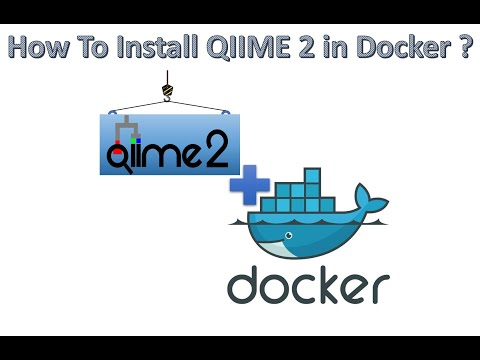

In [93]:
from IPython.display import YouTubeVideo

YouTubeVideo('TQ58fmBq8oE', width=800, height=300)

## REFs

- Christian Diener [github](https://gist.github.com/cdiener)
- qiime2 [Documentation](https://docs.qiime2.org/2020.8/)